# Problem Statement
Welcome to Sigma Cab Private Limited - a cab aggregator service. Their customers can download their app on smartphones and book a cab from any where in the cities they operate in. They, in turn search for cabs from various service providers and provide the best option to their client across available options. They have been in operation for little less than a year now. During this period, they have captured surge_pricing_type from the service providers.

Build a predictive model, which could help Sigma Cabs in predicting the surge_pricing_type pro-actively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.

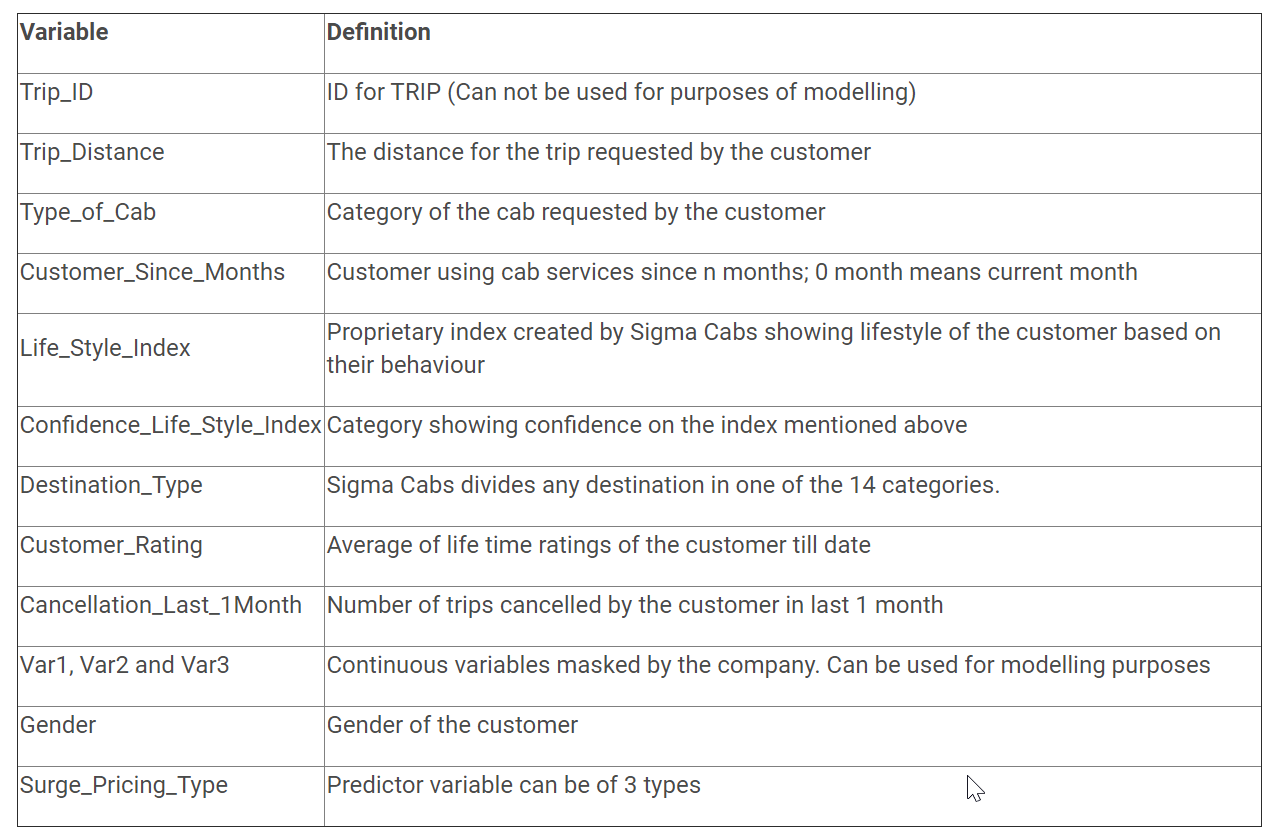

## Hypothesis

--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv('./data/train_Wc8LBpr.csv')

print(df.columns)
df.head()

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


### Columns

In [3]:
num_cols = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index','Customer_Rating', 
            'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3']
ordinal_cols = ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Surge_Pricing_Type']
nominal_cols = ['Destination_Type', 'Gender']
cat_cols = ordinal_cols + nominal_cols
target_col = ['Surge_Pricing_Type']

## Univariate

### Numerical

************Trip_Distance************
 count    131662.000000
mean         44.200909
std          25.522882
min           0.310000
25%          24.580000
50%          38.200000
75%          60.730000
max         109.230000
Name: Trip_Distance, dtype: float64 

Skewness 0.7237521953811848


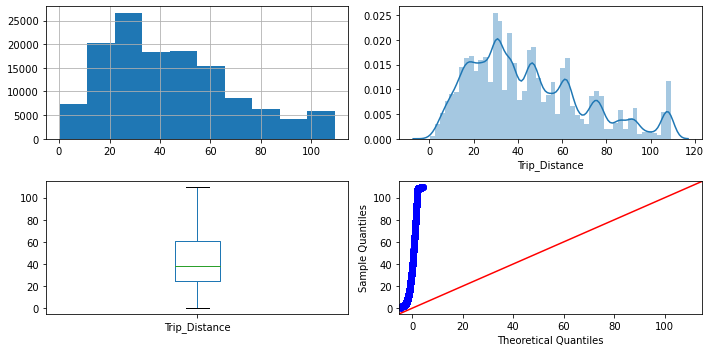

************Customer_Since_Months************
 count    125742.000000
mean          6.016661
std           3.626887
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Customer_Since_Months, dtype: float64 

Skewness -0.2469539573854501


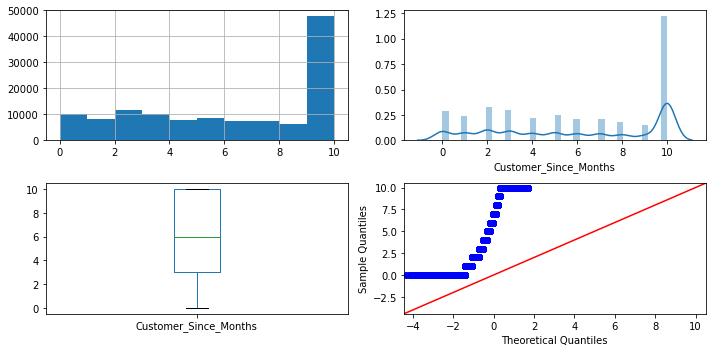

************Life_Style_Index************
 count    111469.000000
mean          2.802064
std           0.225796
min           1.596380
25%           2.654730
50%           2.798050
75%           2.946780
max           4.875110
Name: Life_Style_Index, dtype: float64 

Skewness 0.19399412093255727


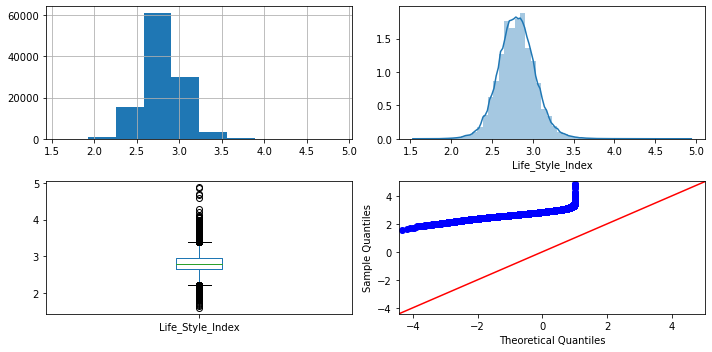

************Customer_Rating************
 count    131662.000000
mean          2.849458
std           0.980675
min           0.001250
25%           2.152500
50%           2.895000
75%           3.582500
max           5.000000
Name: Customer_Rating, dtype: float64 

Skewness -0.1911305870329428


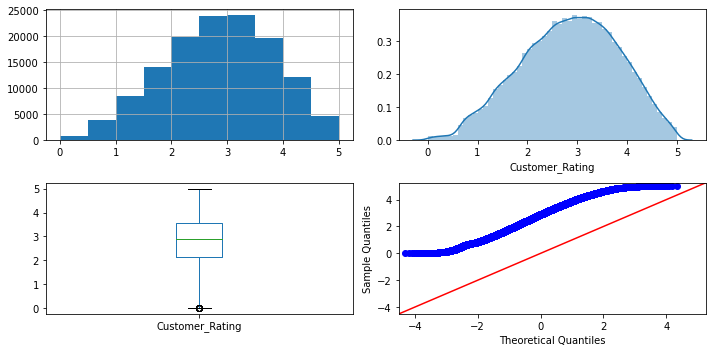

************Cancellation_Last_1Month************
 count    131662.000000
mean          0.782838
std           1.037559
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: Cancellation_Last_1Month, dtype: float64 

Skewness 1.5508693337281214


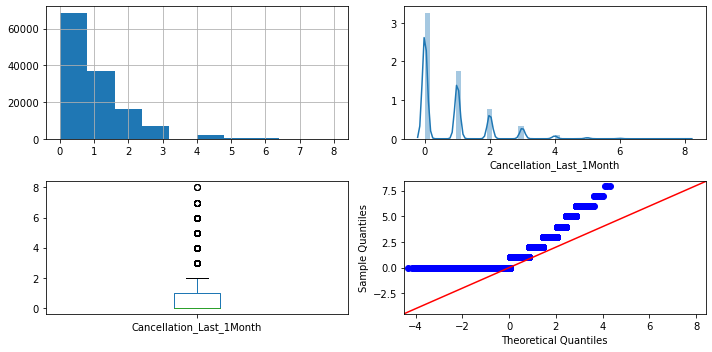

************Var1************
 count    60632.000000
mean        64.202698
std         21.820447
min         30.000000
25%         46.000000
50%         61.000000
75%         80.000000
max        210.000000
Name: Var1, dtype: float64 

Skewness 0.46540080522036126


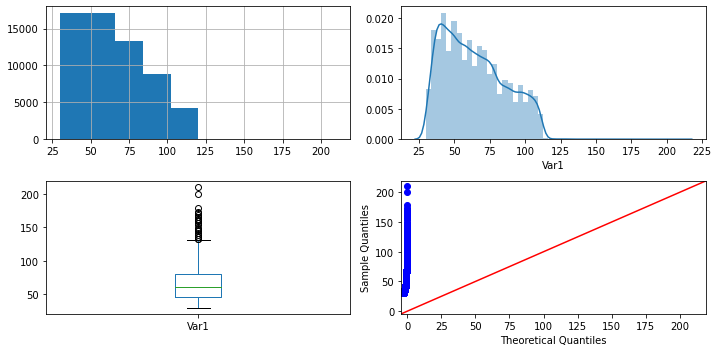

************Var2************
 count    131662.000000
mean         51.202800
std           4.986142
min          40.000000
25%          48.000000
50%          50.000000
75%          54.000000
max         124.000000
Name: Var2, dtype: float64 

Skewness 1.1846339188275112


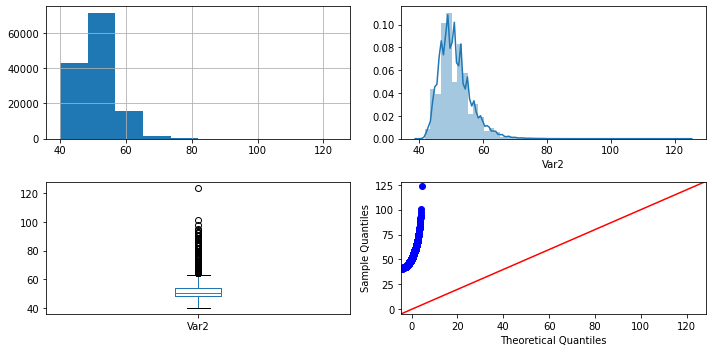

************Var3************
 count    131662.000000
mean         75.099019
std          11.578278
min          52.000000
25%          67.000000
50%          74.000000
75%          82.000000
max         206.000000
Name: Var3, dtype: float64 

Skewness 0.8289765810094026


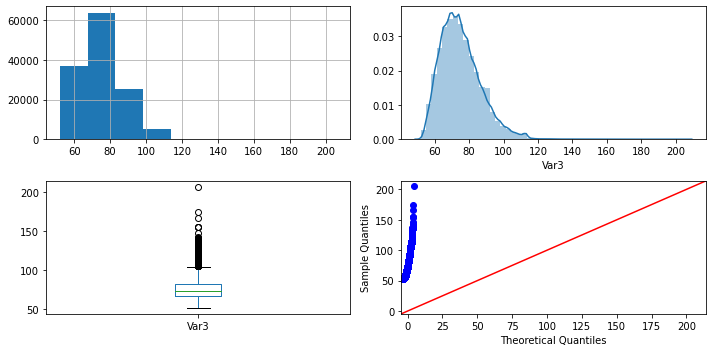

In [4]:
for col in num_cols:
    print("************{}************\n".format(col),df[col].describe(), 
          '\n\nSkewness', df[col].skew())

    fig, axes = plt.subplots(2, 2, figsize=(10,5))

    # Histogram
    df[col].hist(ax=axes[0][0])

    # Distplot
    sns.distplot(df[col], ax=axes[0][1])

    # Box plot
    df[col].plot(kind='box', ax=axes[1][0])

    # Q-Q plot
    sm.qqplot(df[col], line='45', ax=axes[1][1])

    plt.tight_layout()
    plt.show()
    plt.close()

### Categorical


************Type_of_Cab************
B    0.279367
C    0.252324
A    0.193527
D    0.170396
E    0.104386
Name: Type_of_Cab, dtype: float64


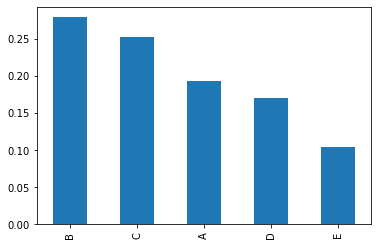


************Confidence_Life_Style_Index************
B    0.362029
C    0.322664
A    0.315307
Name: Confidence_Life_Style_Index, dtype: float64


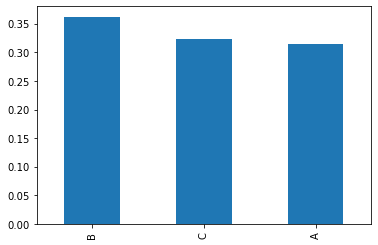


************Surge_Pricing_Type************
2    0.430861
3    0.362443
1    0.206696
Name: Surge_Pricing_Type, dtype: float64


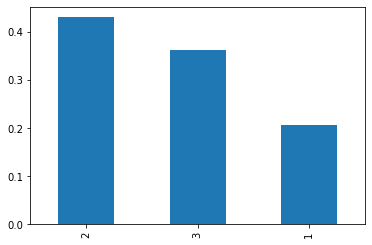


************Destination_Type************
A    0.589365
B    0.224476
C    0.056843
D    0.050037
E    0.020636
F    0.014811
G    0.011309
H    0.009570
I    0.006175
J    0.005279
K    0.005165
L    0.004884
N    0.000744
M    0.000706
Name: Destination_Type, dtype: float64


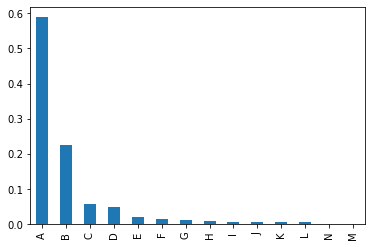


************Gender************
Male      0.71319
Female    0.28681
Name: Gender, dtype: float64


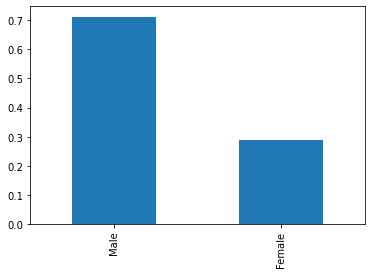

<Figure size 432x288 with 0 Axes>

In [5]:
for col in cat_cols:
    
    print('\n************{}************'.format(col))
    freq_table = df[col].value_counts(normalize=True)
    
    # Frequency table chart
    print(freq_table)
    
    # Bar chart
    freq_table.plot.bar()
    
    plt.show()
    plt.tight_layout()

### Continuous-Continuous

In [6]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [11]:
# cm = sns.light_palette("green", as_cmap=True)
df[num_cols].corr().style.background_gradient(cmap='Greens')

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
Trip_Distance,1.000000,0.116812,0.509482,-0.054654,-0.007686,-0.045468,0.200456,0.231706
Customer_Since_Months,0.116812,1.000000,0.135114,-0.050349,-0.006325,-0.009856,0.042637,0.113403
Life_Style_Index,0.509482,0.135114,1.000000,0.205824,0.074023,-0.091307,0.234754,0.329312
Customer_Rating,-0.054654,-0.050349,0.205824,1.000000,0.003595,-0.010968,-0.302968,-0.227531
Cancellation_Last_1Month,-0.007686,-0.006325,0.074023,0.003595,1.000000,0.010953,0.095830,0.128686
Var1,-0.045468,-0.009856,-0.091307,-0.010968,0.010953,1.000000,-0.046755,-0.061993
Var2,0.200456,0.042637,0.234754,-0.302968,0.095830,-0.046755,1.000000,0.683437
Var3,0.231706,0.113403,0.329312,-0.227531,0.128686,-0.061993,0.683437,1.000000
